
#<center> **A Generalized Tool for Wave-by-Wave Estimation of Nearshore Wave Breaking Patterns from Optical Imagery**<center>

### <center>Francisco J. Sáez $^{a,*}$, Patricio A. Catalán $^{a}$, Carlos Valle $^{b}$<center>
\\

##### <center>$^{a}$ Departamento de Obras Civiles, Universidad Técnica Federico Santa María, Valparaíso, Chile<center>
#####<center>$^{b}$ Departamento de Computación e Informática, Universidad de Playa Ancha Valparaíso, Chile<center>


_$^{∗}$ Corresponding author_.

\\

**Author**    : Francisco Sáez Rosales

**E-mail addresses**: francisco.saez@sansano.usm.cl (F.J. Sáez), patricio.catalan@usm.cl (P.A. Catalán), carlos.valle@upla.cl (C. Valle).


**Date**      : 21-06-2022

#1. Access to Drive Folder and Load Packages and Functions.

## 1.1 Access to Drive Folder

In [1]:
# Load folders
from google.colab import drive
drive.mount('/content/gdrive')
%cd 'gdrive'
%cd 'MyDrive/WBM_F/wave_breaking_model'

Mounted at /content/gdrive
/content/gdrive
/content/gdrive/MyDrive/WBM_F/wave_breaking_model


## 1.2 Load Packages

In [2]:
# DUCK MODEL
from Duck_Model.freeze_weight import freeze_weight

# NET FUNCTIONS
from Neural_Network.create_inputs import *
from Neural_Network.images_to_matrix import *
from Neural_Network.conv2d_block import *
from Neural_Network.get_unet import *
from Neural_Network.f1 import *

# TL FUNCTIONS
import Functions.install_packages
from Functions.query_functions import *
from Functions.transfer_learning import *
from Functions.ensemble_and_plot import *
from Functions.friendly_functions import *
from Functions.function_to_save import *

In [3]:
params ={'project_name': 'Maipo',
         'folder_img': 'All_images',
         'len_xtr': 20,
         'len_xretr': 300,
         'len_xtst': 200,
         'img_format':'png',
         'processing': False ,
         'resize': False,
         'rotation': False,
         'rotation_angle':0,
         'len_img_name': 10
         }

In [4]:
paths = all_paths(username      = 'Saez',
                  images_folder = 'SpicerDuck', # Folder where you save your images => 'project_name': 'Las_Cruces'
                  arrays_folder = 'SpicerDuck', # Folder where you save your images as matrix  => 'project_name': 'Las_Cruces'
                  model2use     = 'model_1')    # Configuration of the model to be used

# 2 Create and/or load datasets

## 2.1 Create dataset

In [ ]:
# This function is only used when images need to be preprocessed
create_training_test_datasets(params)

In [ ]:
images2arrays(paths        = paths,
              xtr_folder   = 'x_tr/images',
              ytr_folder   = 'x_tr/masks',
              xretr_folder = 'x_retr',
              xtst_folder  = 'x_tst')

N° of images in Folder x_tr/images = 10 

N° of images in Folder x_tr/masks = 10 

N° of images in Folder x_retr = 300 

N° of images in Folder x_tst = 190 



  0%|          | 0/10 [00:00<?, ?it/s]

Training arrays were created!


  0%|          | 0/300 [00:00<?, ?it/s]

Retraining array was created!


  0%|          | 0/190 [00:00<?, ?it/s]

Test array was created!


## 2.2 Load Dataset

In [5]:
# Function to load all datasets
x_tr, y_tr, x_val, y_val, x_retr, x_tst = load_datasets_from_array(paths  = paths,
                                                                   x_tr   = True,
                                                                   y_tr   = True,
                                                                   x_retr = True,
                                                                   x_tst  = True
                                                                   )

Initial x_tr shape (16, 512, 512, 1) 

Initial x_val shape (4, 512, 512, 1) 

x_retr shape  (300, 512, 512, 1) 

x_tst shape  (200, 512, 512, 1) 



# 3. Transfer Learning - Fine Tuning

**Description:** We propose to transfer knowledge learned from Duck Beach (Sáez et al., 2021) to your interest area. To make that, we use fine tuning technique and we propose five way to freeze Duck Model weights. You only have to select the model that you want and put model name as input in `model_name` variable at next section.

\\

<center> Table 1: Frozen models description  <center>

Models     | Description                                                     |
-----------|-----------------------------------------------------------------|
`'model_1'`| Freeze only weights from left first layer of Duck Model.        |
`'model_2'`| Freeze only weights from contraction route.                     |
`'model_3'`| Freeze only weights from the last two layer of expansion route. |
`'model_4'`| Freeze only weights from expansion route.                       |
`'model_5'`| Combines model 1 and 3.                                         |

\\

<figure>
<center>
<img src='https://drive.google.com/file/d/1-mfEBkY0MX_1Fq2HP6gnRj5WUR0xaPXa/view?usp=sharing' />
<figcaption>Figure 1: U-Net architecture and frozen models</figcaption></center>
</figure>

## 3.1 Training model

In [6]:
model_setup = {'learning_rate': 1e-2,
               'epochs': 50,
               'batch_size': 2,
               'verbose': True}

data = {'x_tr':   x_tr,
        'y_tr':   y_tr,
        'x_val':  x_val,
        'y_val':  y_val,
        'x_retr': x_retr
        }

model = freeze_weight(paths, 'model_1')

TypeError: Could not locate class 'Functional'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'class_name': 'Functional', 'config': {'name': 'model', 'trainable': True, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 512, 512, 1], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'img'}, 'registered_name': None, 'name': 'img', 'inbound_nodes': []}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_1', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': 0}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 512, 512, 1]}, 'name': 'conv2d_1', 'inbound_nodes': [[['img', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'batch_normalization_1', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 512, 512, 32]}, 'name': 'batch_normalization_1', 'inbound_nodes': [[['conv2d_1', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'activation_1', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'registered_name': None, 'build_config': {'input_shape': [None, 512, 512, 32]}, 'name': 'activation_1', 'inbound_nodes': [[['batch_normalization_1', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 512, 512, 32]}, 'name': 'max_pooling2d', 'inbound_nodes': [[['activation_1', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Dropout', 'config': {'name': 'dropout', 'trainable': True, 'dtype': 'float32', 'rate': 0.2, 'noise_shape': None, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 256, 256, 32]}, 'name': 'dropout', 'inbound_nodes': [[['max_pooling2d', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_3', 'trainable': True, 'dtype': 'float32', 'filters': 64, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': 0}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 256, 256, 32]}, 'name': 'conv2d_3', 'inbound_nodes': [[['dropout', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'batch_normalization_3', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 256, 256, 64]}, 'name': 'batch_normalization_3', 'inbound_nodes': [[['conv2d_3', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'activation_3', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'registered_name': None, 'build_config': {'input_shape': [None, 256, 256, 64]}, 'name': 'activation_3', 'inbound_nodes': [[['batch_normalization_3', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_1', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 256, 256, 64]}, 'name': 'max_pooling2d_1', 'inbound_nodes': [[['activation_3', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Dropout', 'config': {'name': 'dropout_1', 'trainable': True, 'dtype': 'float32', 'rate': 0.2, 'noise_shape': None, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 128, 128, 64]}, 'name': 'dropout_1', 'inbound_nodes': [[['max_pooling2d_1', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_5', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': 0}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 128, 128, 64]}, 'name': 'conv2d_5', 'inbound_nodes': [[['dropout_1', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'batch_normalization_5', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 128, 128, 128]}, 'name': 'batch_normalization_5', 'inbound_nodes': [[['conv2d_5', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'activation_5', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'registered_name': None, 'build_config': {'input_shape': [None, 128, 128, 128]}, 'name': 'activation_5', 'inbound_nodes': [[['batch_normalization_5', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_2', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 128, 128, 128]}, 'name': 'max_pooling2d_2', 'inbound_nodes': [[['activation_5', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Dropout', 'config': {'name': 'dropout_2', 'trainable': True, 'dtype': 'float32', 'rate': 0.2, 'noise_shape': None, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 64, 64, 128]}, 'name': 'dropout_2', 'inbound_nodes': [[['max_pooling2d_2', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_7', 'trainable': True, 'dtype': 'float32', 'filters': 256, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': 0}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 64, 64, 128]}, 'name': 'conv2d_7', 'inbound_nodes': [[['dropout_2', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'batch_normalization_7', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 64, 64, 256]}, 'name': 'batch_normalization_7', 'inbound_nodes': [[['conv2d_7', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'activation_7', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'registered_name': None, 'build_config': {'input_shape': [None, 64, 64, 256]}, 'name': 'activation_7', 'inbound_nodes': [[['batch_normalization_7', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_3', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 64, 64, 256]}, 'name': 'max_pooling2d_3', 'inbound_nodes': [[['activation_7', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Dropout', 'config': {'name': 'dropout_3', 'trainable': True, 'dtype': 'float32', 'rate': 0.2, 'noise_shape': None, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 32, 32, 256]}, 'name': 'dropout_3', 'inbound_nodes': [[['max_pooling2d_3', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_9', 'trainable': True, 'dtype': 'float32', 'filters': 512, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': 0}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 32, 32, 256]}, 'name': 'conv2d_9', 'inbound_nodes': [[['dropout_3', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'batch_normalization_9', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 32, 32, 512]}, 'name': 'batch_normalization_9', 'inbound_nodes': [[['conv2d_9', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'activation_9', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'registered_name': None, 'build_config': {'input_shape': [None, 32, 32, 512]}, 'name': 'activation_9', 'inbound_nodes': [[['batch_normalization_9', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2DTranspose', 'config': {'name': 'conv2d_transpose', 'trainable': True, 'dtype': 'float32', 'filters': 256, 'kernel_size': [3, 3], 'strides': [2, 2], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None, 'output_padding': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 32, 32, 512]}, 'name': 'conv2d_transpose', 'inbound_nodes': [[['activation_9', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Concatenate', 'config': {'name': 'concatenate', 'trainable': True, 'dtype': 'float32', 'axis': -1}, 'registered_name': None, 'build_config': {'input_shape': [[None, 64, 64, 256], [None, 64, 64, 256]]}, 'name': 'concatenate', 'inbound_nodes': [[['conv2d_transpose', 0, 0, {}], ['activation_7', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Dropout', 'config': {'name': 'dropout_4', 'trainable': True, 'dtype': 'float32', 'rate': 0.2, 'noise_shape': None, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 64, 64, 512]}, 'name': 'dropout_4', 'inbound_nodes': [[['concatenate', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_11', 'trainable': True, 'dtype': 'float32', 'filters': 256, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': 0}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 64, 64, 512]}, 'name': 'conv2d_11', 'inbound_nodes': [[['dropout_4', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'batch_normalization_11', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 64, 64, 256]}, 'name': 'batch_normalization_11', 'inbound_nodes': [[['conv2d_11', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'activation_11', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'registered_name': None, 'build_config': {'input_shape': [None, 64, 64, 256]}, 'name': 'activation_11', 'inbound_nodes': [[['batch_normalization_11', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2DTranspose', 'config': {'name': 'conv2d_transpose_1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [3, 3], 'strides': [2, 2], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None, 'output_padding': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 64, 64, 256]}, 'name': 'conv2d_transpose_1', 'inbound_nodes': [[['activation_11', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Concatenate', 'config': {'name': 'concatenate_1', 'trainable': True, 'dtype': 'float32', 'axis': -1}, 'registered_name': None, 'build_config': {'input_shape': [[None, 128, 128, 128], [None, 128, 128, 128]]}, 'name': 'concatenate_1', 'inbound_nodes': [[['conv2d_transpose_1', 0, 0, {}], ['activation_5', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Dropout', 'config': {'name': 'dropout_5', 'trainable': True, 'dtype': 'float32', 'rate': 0.2, 'noise_shape': None, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 128, 128, 256]}, 'name': 'dropout_5', 'inbound_nodes': [[['concatenate_1', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_13', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': 0}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 128, 128, 256]}, 'name': 'conv2d_13', 'inbound_nodes': [[['dropout_5', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'batch_normalization_13', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 128, 128, 128]}, 'name': 'batch_normalization_13', 'inbound_nodes': [[['conv2d_13', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'activation_13', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'registered_name': None, 'build_config': {'input_shape': [None, 128, 128, 128]}, 'name': 'activation_13', 'inbound_nodes': [[['batch_normalization_13', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2DTranspose', 'config': {'name': 'conv2d_transpose_2', 'trainable': True, 'dtype': 'float32', 'filters': 64, 'kernel_size': [3, 3], 'strides': [2, 2], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None, 'output_padding': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 128, 128, 128]}, 'name': 'conv2d_transpose_2', 'inbound_nodes': [[['activation_13', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Concatenate', 'config': {'name': 'concatenate_2', 'trainable': True, 'dtype': 'float32', 'axis': -1}, 'registered_name': None, 'build_config': {'input_shape': [[None, 256, 256, 64], [None, 256, 256, 64]]}, 'name': 'concatenate_2', 'inbound_nodes': [[['conv2d_transpose_2', 0, 0, {}], ['activation_3', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Dropout', 'config': {'name': 'dropout_6', 'trainable': True, 'dtype': 'float32', 'rate': 0.2, 'noise_shape': None, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 256, 256, 128]}, 'name': 'dropout_6', 'inbound_nodes': [[['concatenate_2', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_15', 'trainable': True, 'dtype': 'float32', 'filters': 64, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': 0}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 256, 256, 128]}, 'name': 'conv2d_15', 'inbound_nodes': [[['dropout_6', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'batch_normalization_15', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 256, 256, 64]}, 'name': 'batch_normalization_15', 'inbound_nodes': [[['conv2d_15', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'activation_15', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'registered_name': None, 'build_config': {'input_shape': [None, 256, 256, 64]}, 'name': 'activation_15', 'inbound_nodes': [[['batch_normalization_15', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2DTranspose', 'config': {'name': 'conv2d_transpose_3', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [2, 2], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None, 'output_padding': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 256, 256, 64]}, 'name': 'conv2d_transpose_3', 'inbound_nodes': [[['activation_15', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Concatenate', 'config': {'name': 'concatenate_3', 'trainable': True, 'dtype': 'float32', 'axis': -1}, 'registered_name': None, 'build_config': {'input_shape': [[None, 512, 512, 32], [None, 512, 512, 32]]}, 'name': 'concatenate_3', 'inbound_nodes': [[['conv2d_transpose_3', 0, 0, {}], ['activation_1', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Dropout', 'config': {'name': 'dropout_7', 'trainable': True, 'dtype': 'float32', 'rate': 0.2, 'noise_shape': None, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 512, 512, 64]}, 'name': 'dropout_7', 'inbound_nodes': [[['concatenate_3', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_17', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': 0}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 512, 512, 64]}, 'name': 'conv2d_17', 'inbound_nodes': [[['dropout_7', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'batch_normalization_17', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 512, 512, 32]}, 'name': 'batch_normalization_17', 'inbound_nodes': [[['conv2d_17', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'activation_17', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'registered_name': None, 'build_config': {'input_shape': [None, 512, 512, 32]}, 'name': 'activation_17', 'inbound_nodes': [[['batch_normalization_17', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_18', 'trainable': True, 'dtype': 'float32', 'filters': 1, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 512, 512, 32]}, 'name': 'conv2d_18', 'inbound_nodes': [[['activation_17', 0, 0, {}]]]}], 'input_layers': [['img', 0, 0]], 'output_layers': [['conv2d_18', 0, 0]]}, 'keras_version': '2.15.0', 'backend': 'tensorflow'}

IntProgress(value=2, bar_style='success', description='Loading:', layout=Layout(height='25px', width='30%'), m…

HTML(value='<b><center><font size=4.5>Classification of images according to expert criteria</b></center>')

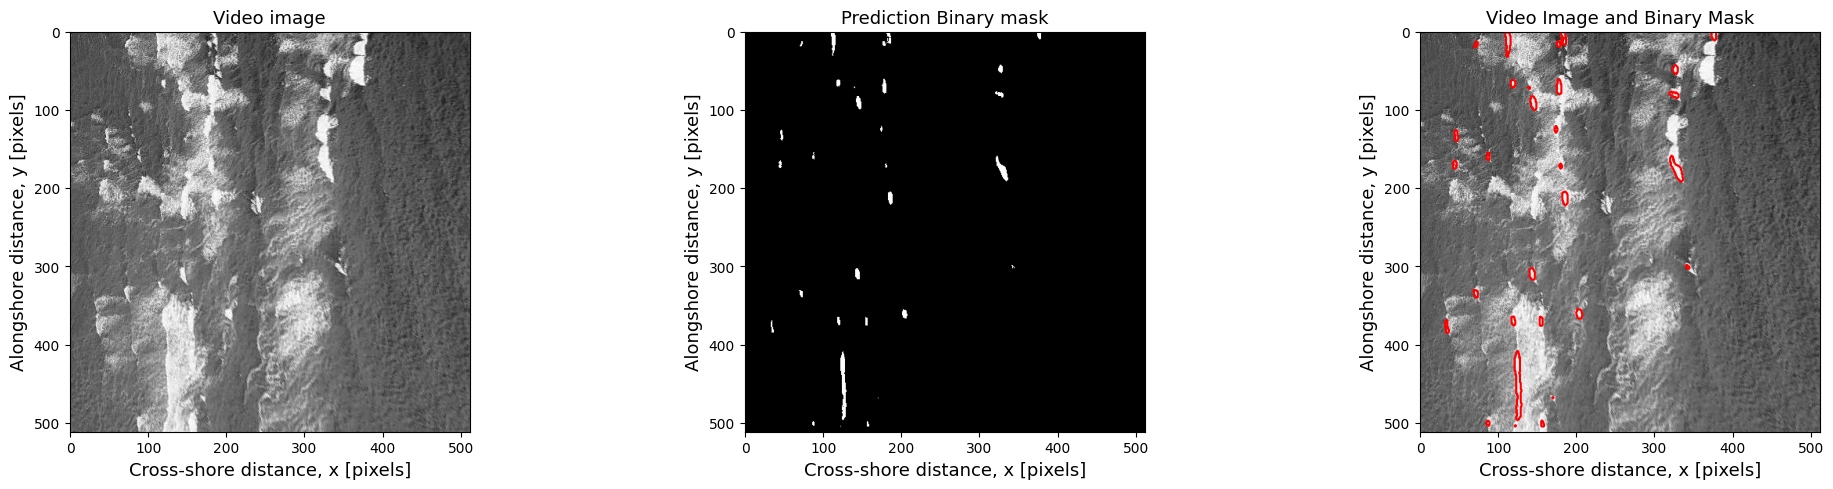

HTML(value="<b><center><font size=4.5>Classify the image from 1 to 5 according to net's performance</b></cente…



Training N° 3 finished


In [ ]:
UNet_engine(paths,
            model,
            data,
            iterations     = 3,
            n_img          = 10,
            model_selected = 'model_5',
            model_setup    = model_setup)

## 3.2 LOAD RESULTS

In [ ]:
# Models
model_names = ['Model_2']
# Iterations
number_iterations = ['Iteration_1',
                     'Iteration_2',
                     'Iteration_3']

# Load results for models selected
results = load_results(paths, model_names)

Model_2
Results loaded


In [ ]:
# Load models
models_loaded = load_models(paths,
                            model_names,                          # Name of Models
                            number_iterations)                    # Number of Iterations

scores_loaded = load_score_per_models(results,                    # Results per models and iterations
                                      model_names,                # Name of Models
                                      number_iterations)          # Number of Iterations

Model_2 of Iteration_1 Loaded
Model_2 of Iteration_2 Loaded
Model_2 of Iteration_3 Loaded
Scores Loaded


## 3.3 Plot Accuracy and Loss


Model_5


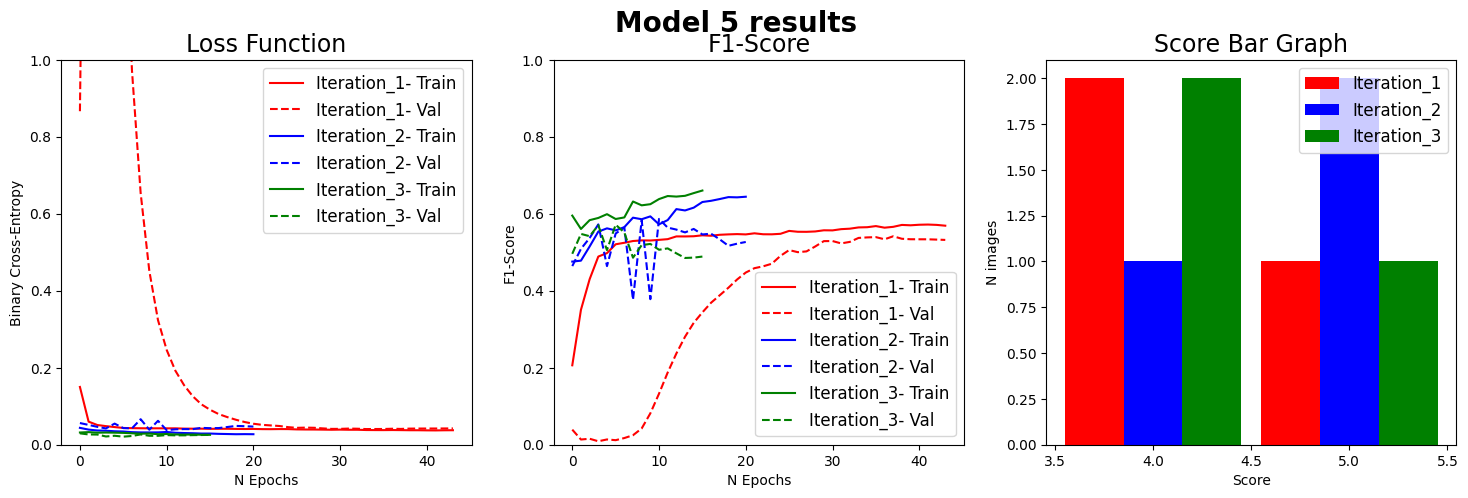

In [ ]:
# Plot results
plot_results_per_model(results,              # Dictorinary with results
                       model_names,          # models
                       number_iterations)    # iterations

# 4. Ensemble

**Description:** the main idea is use a linear combination of the best models. Then the final breaking mask is an weigth average of all models selected.

$$\text{mask} = \sum_{i}^{M} \sum_{j}^{N} \alpha_{ij}\hspace{1mm}\text{mask}_{ij} $$

where $\text{mask}$ is `y_pred = model.predict(x_tst)`, $M$ is number of models, $N$ is number of iterations and $\alpha$ is the weight for each model.


## 4.1 Ensemble prediction on Test Set

In [ ]:
# Load test set to play!
x_tst = np.load(paths['arrays'] / 'x_tst.npy')

In [ ]:
# Ensemble process
masks_ensemble = ensemble_models(models_loaded,                                  # Models to ensemble
                                 model_names,                                    # Model to use
                                 scores_loaded,                                  # Score per model
                                 number_iterations,                              # Iterations per model
                                 x_tst)                                          # Test Set

6/6 [==============================] - 49s 5s/step

Model_2 of Iteration_1 prediction done with weight= 28.999999999999996%

6/6 [==============================] - 3s 565ms/step

Model_2 of Iteration_2 prediction done with weight= 43.0%

6/6 [==============================] - 3s 571ms/step

Model_2 of Iteration_3 prediction done with weight= 28.999999999999996%



## 4.2 Plot Ensemble Predictions

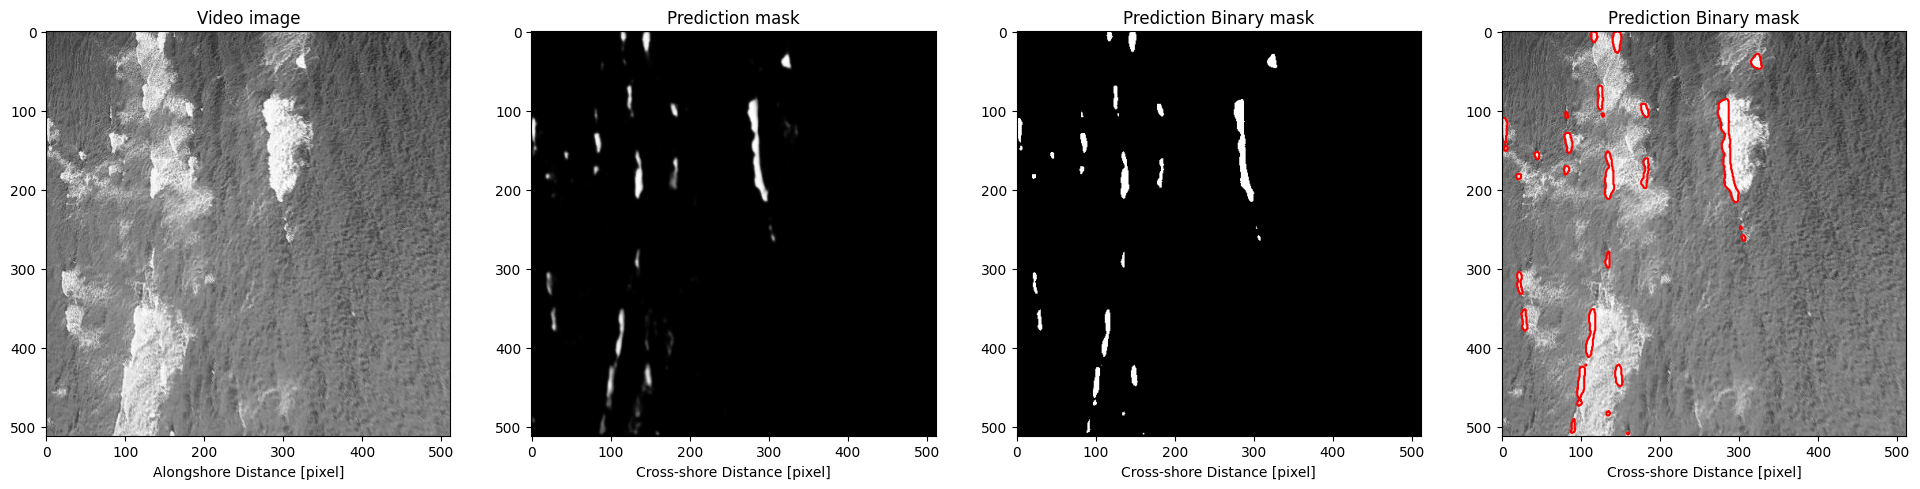

In [ ]:
plot_predictions(x_tst,                   # DataSet to make the prediction
                 masks_ensemble,          # Breaking Masks - prediction
                 model_names,             # Model used
                 index = 40,               # N° of image
                 threshold=0.3)           # Threshold to get binary mask›


##4.3 Save results

In [ ]:
img_post = full_dataset_processing(params, 'All_images')

Subset N°2 of 2 was created 



In [ ]:
img_from = 'All_images'
prediction_on_whole_dataset(params,                 # params to preprocessing images
                            paths,                  # paths
                            img_from,               # folder of all images
                            model_names,            # names of models to use
                            models_loaded,          # loaded models
                            scores_loaded,          # loaded scores
                            number_iterations)      # used number of iterations

#----------------------------------------------
#
#      Model_5 predictions - subset N°1
#
#----------------------------------------------


13/13 [==============================] - 19s 2s/step

Model_5 of Iteration_1 prediction done with weight= 33.0%

13/13 [==============================] - 7s 549ms/step

Model_5 of Iteration_2 prediction done with weight= 50.0%

13/13 [==============================] - 7s 549ms/step

Model_5 of Iteration_3 prediction done with weight= 17.0%

Subset N°1: masks saved! 
 
#----------------------------------------------
#
#      Model_5 predictions - subset N°2
#
#----------------------------------------------


4/4 [==============================] - 6s 2s/step

Model_5 of Iteration_1 prediction done with weight= 33.0%

4/4 [==============================] - 2s 541ms/step

Model_5 of Iteration_2 prediction done with weight= 50.0%

4/4 [==============================] - 2s 540ms/step

Model_5 of Iteration_3 prediction done with weight= 17.0%

Subset N°

In [ ]:
save_img_predicted(paths, params, 'Model_2', 'All_images', 0.3)

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]